Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Comunitățile detectate:
Node 1: Community 0
Node 2: Community 0
Node 3: Community 0
Node 4: Community 0
Node 5: Community 2
Node 6: Community 2
Node 7: Community 2
Node 8: Community 0
Node 9: Community 1
Node 10: Community 0
Node 11: Community 2
Node 12: Community 0
Node 13: Community 0
Node 14: Community 0
Node 15: Community 1
Node 16: Community 1
Node 17: Community 2
Node 18: Community 0
Node 19: Community 1
Node 20: Community 0
Node 21: Community 1
Node 22: Community 0
Node 23: Community 1
Node 24: Community 3
Node 25: Community 3
Node 26: Community 3
Node 27: Community 1
Node 28: Community 3
Node 29: Community 3
Node 30: Community 1
Node 31: Community 1
Node 32: Community 3
Node 33: Community 1
Node 34: Community 1


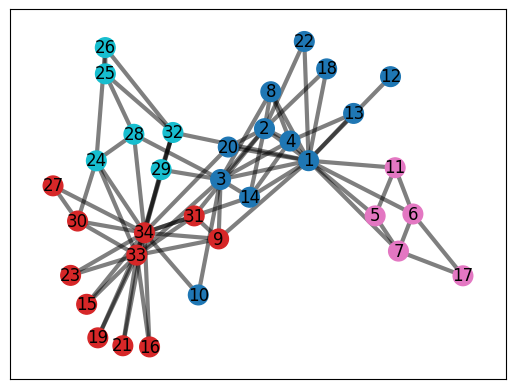

In [16]:
# Încărcarea bibliotecilor și funcțiilor necesare
import networkx as nx
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt
import random
from google.colab import drive

# Montează Google Drive
drive.mount('/content/drive')

# Funcția pentru crearea graficului din noduri și muchii
def create_graph(nodes, edges):
    G = nx.Graph()
    for node_label, node_data in nodes.items():
        G.add_node(node_label, **node_data)
    for source, target in edges:
        G.add_edge(source, target)
    return G

# Funcția pentru citirea rețelei dintr-o listă de muchii
def read_edge_list_network(file_path):
    G = nx.Graph()
    with open(file_path, 'r') as file:
        lines = file.readlines()
    for line in lines:
        if not line.strip() or line.strip().startswith('%'):
            continue
        try:
            source, target = map(int, line.strip().split()[:2])
            G.add_edge(source, target)
        except ValueError:
            print(f"Ignorând linia: {line.strip()}. Nu poate fi parsată corect.")
            continue
    return G

# Funcția pentru citirea și crearea graficului dintr-un fișier GML personalizat
def my_read_gml(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    nodes = {}
    edges = set()
    current_node = None
    source = None
    target = None

    for line in lines:
        line = line.strip()
        if line.startswith("node"):
            current_node = {}
        elif line.startswith("edge"):
            current_node = None
        elif line.startswith("id"):
            if current_node is not None:
                current_node['id'] = line.split()[1]
        elif line.startswith("label"):
            if current_node is not None:
                current_node['label'] = line.split()[1].strip('"')
        elif line.startswith("value"):
            if current_node is not None:
                value_str = line.split()[1].strip('"')
                try:
                    current_node['value'] = int(value_str)
                except ValueError:
                    current_node['value'] = value_str
        elif line.startswith("source"):
            source = line.split()[1]
        elif line.startswith("target"):
            target = line.split()[1]
            edges.add((source, target))
        elif line == "]":
            if current_node is not None:
                node_id = current_node.get('id')
                node_label = current_node.get('label', node_id)
                nodes[node_id] = current_node
    return nodes, edges

# Funcția pentru citirea rețelei dintr-un fișier GML
def read_gml(file):
    try:
        with open(file, 'r') as f:
            G = nx.parse_gml(f, label='id')
        print("Graph successfully read.")
        MG = nx.MultiGraph(G)
        for node in MG.nodes():
            if 'label' not in MG.nodes[node]:
                MG.nodes[node]['label'] = str(node)
        G_unique = nx.Graph()
        for u, v, data in MG.edges(data=True):
            if not G_unique.has_edge(u, v):
                G_unique.add_edge(u, v, **data)
        return G_unique
    except Exception as e:
        print(f"Error reading GML file: {e}")
        raise

# Funcția pentru citirea și crearea graficului, cu opțiunea de a citi un fișier GML
def read_and_create_graph(file_path, is_gml=True):
    if(is_gml):
        nodes, edges = my_read_gml(file_path)
        graph = create_graph(nodes, edges)
    else:
        graph = read_edge_list_network(file_path)
    return graph

# Funcția principală care folosește instrumentele și afișează rezultatele
def withTools(file, is_gml=True):
    # Citește fișierul GML
    G = read_and_create_graph(file, is_gml)

    # Detectează comunitățile folosind algoritmul Louvain
    partition = community_louvain.best_partition(G)

    # Afișează comunitățile
    print("Comunitățile detectate:")
    for node, community in partition.items():
        print(f"Node {node}: Community {community}")

    # Desenarea graficului
    pos = nx.spring_layout(G)
    colors = [partition[node] for node in G.nodes()]
    cmap = plt.get_cmap('tab10')  # Alegem o altă hartă de culori
    nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=cmap, node_size=200)
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=3)
    nx.draw_networkx_labels(G, pos, font_size=12)

    plt.show()


# Apelul funcției principale cu calea către fișierul GML din Google Drive
withTools('/content/drive/My Drive/real/karate/karate.gml')


Comunitățile detectate:
Node 0: Community 5
Node 1: Community 1
Node 2: Community 2
Node 3: Community 3
Node 4: Community 5
Node 5: Community 3
Node 6: Community 2
Node 7: Community 4
Node 8: Community 4
Node 9: Community 5
Node 10: Community 3
Node 11: Community 5
Node 12: Community 6
Node 13: Community 2
Node 14: Community 6
Node 15: Community 2
Node 16: Community 5
Node 17: Community 7
Node 18: Community 6
Node 19: Community 8
Node 20: Community 7
Node 21: Community 4
Node 22: Community 4
Node 23: Community 5
Node 24: Community 5
Node 25: Community 1
Node 26: Community 6
Node 27: Community 7
Node 28: Community 5
Node 29: Community 8
Node 30: Community 8
Node 31: Community 6
Node 32: Community 2
Node 33: Community 1
Node 34: Community 6
Node 35: Community 8
Node 36: Community 6
Node 37: Community 1
Node 38: Community 6
Node 39: Community 2
Node 40: Community 3
Node 41: Community 5
Node 42: Community 6
Node 43: Community 6
Node 44: Community 9
Node 45: Community 1
Node 46: Community 0

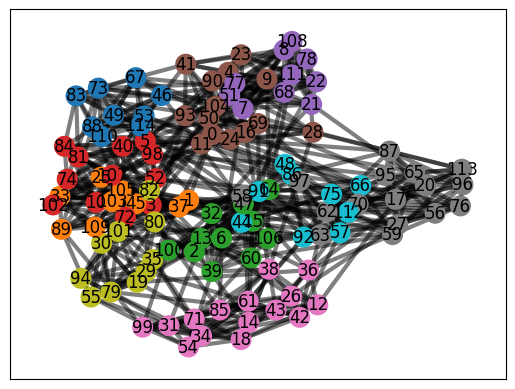

In [17]:
withTools('/content/drive/My Drive/real/football/football.gml')

Comunitățile detectate:
Node 0: Community 0
Node 1: Community 4
Node 2: Community 0
Node 3: Community 2
Node 4: Community 3
Node 5: Community 4
Node 6: Community 4
Node 7: Community 0
Node 8: Community 2
Node 9: Community 4
Node 10: Community 0
Node 11: Community 3
Node 12: Community 1
Node 13: Community 4
Node 14: Community 1
Node 15: Community 3
Node 16: Community 1
Node 17: Community 4
Node 18: Community 3
Node 19: Community 0
Node 20: Community 2
Node 21: Community 3
Node 22: Community 4
Node 23: Community 3
Node 24: Community 3
Node 25: Community 4
Node 26: Community 4
Node 27: Community 4
Node 28: Community 2
Node 29: Community 3
Node 30: Community 0
Node 31: Community 4
Node 32: Community 4
Node 33: Community 1
Node 34: Community 1
Node 35: Community 3
Node 36: Community 2
Node 37: Community 1
Node 38: Community 1
Node 39: Community 2
Node 40: Community 1
Node 41: Community 4
Node 42: Community 0
Node 43: Community 1
Node 44: Community 1
Node 45: Community 3
Node 46: Community 1

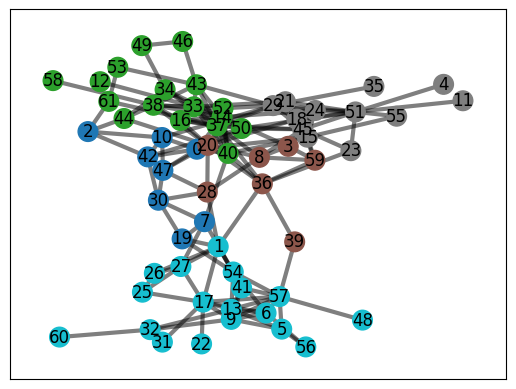

In [18]:
withTools('/content/drive/My Drive/real/dolphins/dolphins.gml')

Comunitățile detectate:
Node 0: Community 0
Node 1: Community 0
Node 2: Community 0
Node 3: Community 3
Node 4: Community 0
Node 5: Community 0
Node 6: Community 0
Node 7: Community 0
Node 8: Community 3
Node 9: Community 3
Node 10: Community 3
Node 11: Community 3
Node 12: Community 3
Node 13: Community 3
Node 14: Community 3
Node 15: Community 3
Node 16: Community 3
Node 17: Community 3
Node 18: Community 3
Node 19: Community 3
Node 20: Community 3
Node 21: Community 3
Node 22: Community 3
Node 23: Community 3
Node 24: Community 3
Node 25: Community 3
Node 26: Community 3
Node 27: Community 3
Node 28: Community 0
Node 29: Community 0
Node 30: Community 1
Node 31: Community 1
Node 32: Community 3
Node 33: Community 3
Node 34: Community 3
Node 35: Community 3
Node 36: Community 3
Node 37: Community 3
Node 38: Community 3
Node 39: Community 3
Node 40: Community 3
Node 41: Community 3
Node 42: Community 3
Node 43: Community 3
Node 44: Community 3
Node 45: Community 3
Node 46: Community 3

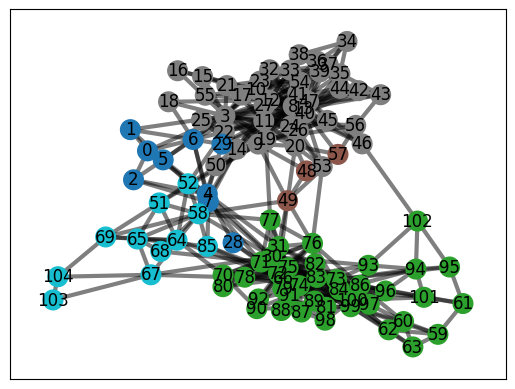

In [19]:
withTools('/content/drive/My Drive/real/krebs/krebs.gml')

Comunitățile detectate:
Node 1: Community 1
Node 2: Community 1
Node 3: Community 0
Node 4: Community 1
Node 5: Community 1
Node 6: Community 1
Node 7: Community 1
Node 8: Community 1
Node 9: Community 1
Node 10: Community 1
Node 11: Community 1
Node 12: Community 0
Node 13: Community 0
Node 14: Community 0
Node 15: Community 0
Node 16: Community 0
Node 17: Community 0
Node 18: Community 1
Node 19: Community 0
Node 20: Community 1
Node 21: Community 0
Node 22: Community 1
Node 23: Community 1
Node 24: Community 1


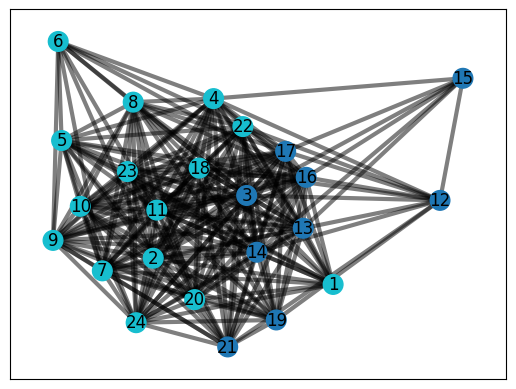

In [21]:
withTools('/content/drive/My Drive/real/mine/mammalia-raccoon-proximity.edges', False)

Comunitățile detectate:
Node 2: Community 1
Node 1: Community 1
Node 3: Community 1
Node 4: Community 1
Node 25: Community 1
Node 28: Community 1
Node 29: Community 1
Node 5: Community 1
Node 6: Community 1
Node 7: Community 2
Node 30: Community 1
Node 8: Community 2
Node 9: Community 2
Node 10: Community 2
Node 11: Community 2
Node 12: Community 2
Node 13: Community 2
Node 27: Community 2
Node 26: Community 0
Node 15: Community 0
Node 14: Community 0
Node 16: Community 0
Node 17: Community 0
Node 18: Community 0
Node 19: Community 0
Node 20: Community 0
Node 21: Community 3
Node 22: Community 3
Node 23: Community 3
Node 24: Community 3
Node 31: Community 3
Node 36: Community 3
Node 34: Community 3
Node 35: Community 3
Node 33: Community 3
Node 32: Community 3
Node 37: Community 3


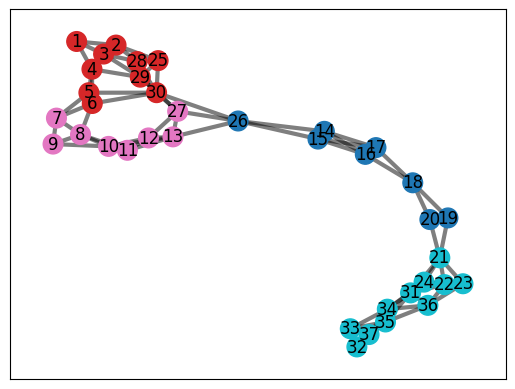

In [22]:
withTools('/content/drive/My Drive/real/mine/ENZYMES_g1.edges', False)

Comunitățile detectate:
Node 1: Community 0
Node 2: Community 0
Node 3: Community 0
Node 17: Community 0
Node 4: Community 0
Node 5: Community 0
Node 855: Community 0
Node 6: Community 1
Node 7: Community 1
Node 880: Community 1
Node 8: Community 2
Node 22: Community 1
Node 23: Community 2
Node 411: Community 1
Node 453: Community 2
Node 454: Community 1
Node 889: Community 3
Node 9: Community 2
Node 479: Community 2
Node 480: Community 2
Node 561: Community 2
Node 10: Community 2
Node 537: Community 2
Node 1074: Community 2
Node 11: Community 2
Node 536: Community 4
Node 12: Community 2
Node 560: Community 2
Node 13: Community 2
Node 27: Community 2
Node 30: Community 2
Node 559: Community 2
Node 14: Community 2
Node 596: Community 2
Node 1138: Community 2
Node 34: Community 2
Node 15: Community 0
Node 16: Community 0
Node 18: Community 0
Node 19: Community 0
Node 823: Community 0
Node 20: Community 0
Node 388: Community 0
Node 389: Community 0
Node 627: Community 0
Node 21: Community

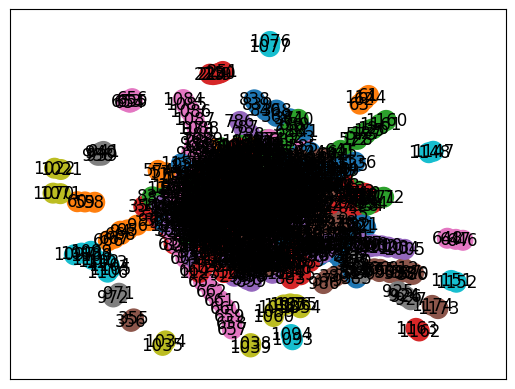

In [24]:
withTools('/content/drive/My Drive/real/mine/road-euroroad.edges', False)

Comunitățile detectate:
Node 52: Community 0
Node 1: Community 1
Node 2: Community 2
Node 3: Community 2
Node 4: Community 1
Node 5: Community 3
Node 8: Community 1
Node 9: Community 2
Node 10: Community 1
Node 11: Community 1
Node 12: Community 3
Node 13: Community 3
Node 15: Community 3
Node 23: Community 2
Node 25: Community 3
Node 26: Community 3
Node 27: Community 3
Node 30: Community 1
Node 31: Community 2
Node 33: Community 0
Node 34: Community 0
Node 38: Community 0
Node 40: Community 0
Node 42: Community 0
Node 45: Community 0
Node 46: Community 0
Node 47: Community 2
Node 48: Community 0
Node 37: Community 3
Node 53: Community 1
Node 41: Community 2
Node 43: Community 1
Node 44: Community 1
Node 49: Community 1
Node 50: Community 1
Node 51: Community 3
Node 54: Community 1
Node 6: Community 1
Node 7: Community 1
Node 14: Community 3
Node 16: Community 3
Node 17: Community 2
Node 18: Community 2
Node 19: Community 2
Node 20: Community 2
Node 21: Community 1
Node 22: Community 

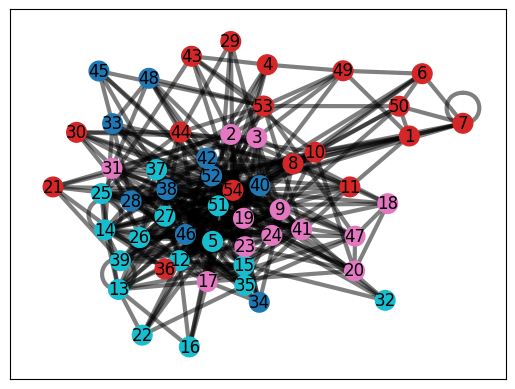

In [25]:
withTools('/content/drive/My Drive/real/mine/eco-stmarks.edges', False)

Comunitățile detectate:
Node 1: Community 0
Node 2: Community 0
Node 3: Community 0
Node 4: Community 0
Node 5: Community 0
Node 6: Community 0
Node 7: Community 0
Node 8: Community 3
Node 9: Community 1
Node 10: Community 2
Node 11: Community 2
Node 12: Community 2
Node 13: Community 2
Node 14: Community 2
Node 15: Community 2
Node 16: Community 3
Node 17: Community 3
Node 18: Community 3


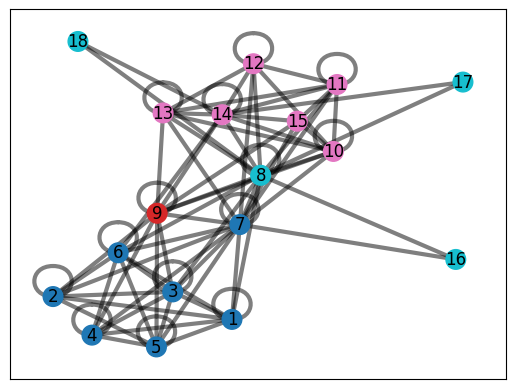

In [26]:
withTools('/content/drive/My Drive/real/mine/ia-southernwomen.edges', False)